https://neptune.ai/blog/pytorch-loss-functions#:~:text=Loss%20functions%20are%20used%20to,to%20yield%20the%20desired%20results.

https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch



In [ ]:
import torch.nn as nn

print(torch.version)

<module 'torch.version' from '/usr/local/lib/python3.10/dist-packages/torch/version.py'>


In [ ]:
input = torch.randn(2, 1, requires_grad=True)
target = torch.randn(2, 1)

**1. PyTorch Mean Absolute Error (L1 Loss Function)**

In [ ]:
mae_loss1 = nn.L1Loss()
print("*"*10, "output", "*"*10)
output = mae_loss1(input, target)
output.backward()
print(input)
print(target)
print(output)

********** output **********
tensor([[-0.9543],
        [ 0.1264]], requires_grad=True)
tensor([[-1.1917],
        [-0.1410]])
tensor(0.2523, grad_fn=<MeanBackward0>)


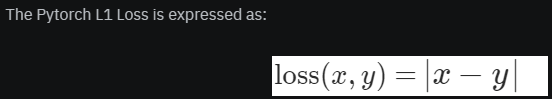

**2. PyTorch Mean Squared Error Loss Function**

In [ ]:

mse_loss2 = torch.nn.MSELoss()
output = mse_loss2(input, target)
output.backward()
print(input)
print(target)
print(output)

tensor([[-0.9543],
        [ 0.1264]], requires_grad=True)
tensor([[-1.1917],
        [-0.1410]])
tensor(0.0639, grad_fn=<MseLossBackward0>)


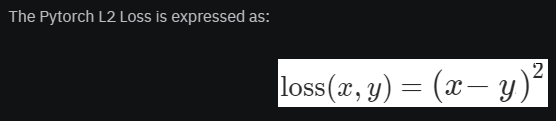

**3. PyTorch Negative Log-Likelihood Loss Function**

In [ ]:
input2 = torch.randn(3,5,requires_grad=True)
target2 = torch.tensor([1, 0, 4])
nll_loss3 = torch.nn.NLLLoss()
# m = nn.Softmax(dim=1)
m = nn.LogSoftmax(dim=1)
print(input2)
print(m(input2))
# print("sum1: ", torch.sum(input2, dim=0))
# print("sum2: ", torch.sum(input2, dim=1))

output = nll_loss3(m(input2), target2)
output.backward()
print(target2)
print(output)

tensor([[-0.1687,  0.3436, -1.4315, -1.0051,  0.8600],
        [-1.5139,  0.0387, -0.0607, -0.3666, -0.2041],
        [ 0.1251,  0.1208, -2.1073,  0.4220, -1.7873]], requires_grad=True)
tensor([[-1.8217, -1.3095, -3.0846, -2.6581, -0.7930],
        [-2.8246, -1.2721, -1.3715, -1.6774, -1.5149],
        [-1.2800, -1.2842, -3.5123, -0.9830, -3.1923]],
       grad_fn=<LogSoftmaxBackward0>)
tensor([1, 0, 4])
tensor(2.4421, grad_fn=<NllLossBackward0>)


In [ ]:
import numpy as np
input_logSoftmax = torch.tensor(([[2,3],[3,4]]),requires_grad=True,dtype=float)
print(input_logSoftmax)
print(m(input_logSoftmax))
arr_logSoftmax = [[2,3],[3,4]]

def logsoftmax(x):
    numerator = np.exp(x)
    denominator = np.sum(np.exp(x), axis=1)
    x = numerator / denominator
    log_x = np.log(x) # log is based on e
    return log_x

print(np.transpose(logsoftmax(arr_logSoftmax)))

tensor([[2., 3.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)
tensor([[-1.3133, -0.3133],
        [-1.3133, -0.3133]], dtype=torch.float64,
       grad_fn=<LogSoftmaxBackward0>)
[[-1.31326169 -0.31326169]
 [-1.31326169 -0.31326169]]


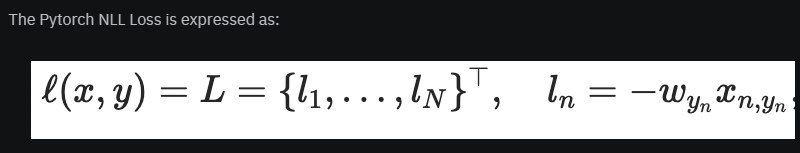

- software激活：分母j 代表该列自然数指数之和
- logsoftmax激活：log(res of software)

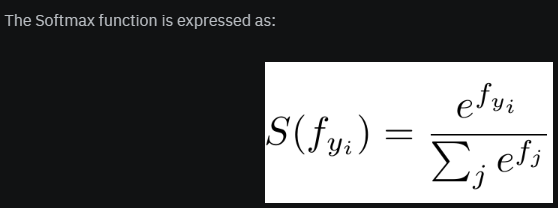

**4. PyTorch Cross-Entropy Loss Function**

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long)
print(target)
target.random_(5)
print(target)

cross_entropy_loss = nn.CrossEntropyLoss(reduction="mean")
output = cross_entropy_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

tensor([130656240, 130793776,        64])
tensor([4, 3, 4])
input:  tensor([[ 0.5178, -0.3362, -0.4583,  0.4580,  1.1144],
        [ 0.9413, -0.5162,  1.0911, -1.0726, -1.6174],
        [-0.3392, -0.6343, -0.4196,  0.2304, -1.5520]], requires_grad=True)
target:  tensor([4, 3, 4])
output:  tensor(2.2198, grad_fn=<NllLossBackward0>)


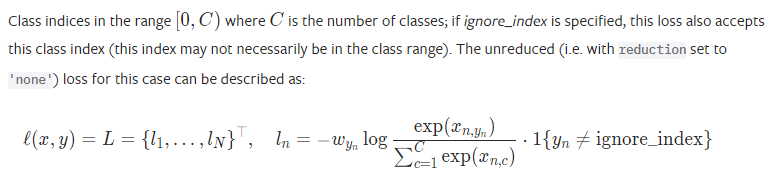

**5. PyTorch Hinge Embedding Loss Function**

In [ ]:
import torch
import torch.nn as nn
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

hinge_loss = nn.HingeEmbeddingLoss()
output = hinge_loss(input, target)
print(output)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)


tensor(1.1119, grad_fn=<MeanBackward0>)
input:  tensor([[ 0.7854,  0.7875,  1.8515, -0.6901,  1.0769],
        [-1.1170,  0.0573,  0.7988,  0.1585,  0.6764],
        [ 1.3946, -0.1891, -1.6796,  1.3555,  0.4933]], requires_grad=True)
target:  tensor([[ 0.2879, -1.6061, -1.3177,  1.0750,  1.2245],
        [ 0.8503,  1.3344,  2.0096,  0.8742,  1.6823],
        [-1.8455, -1.2391,  0.5021,  0.0297,  0.8475]])
output:  tensor(1.1119, grad_fn=<MeanBackward0>)


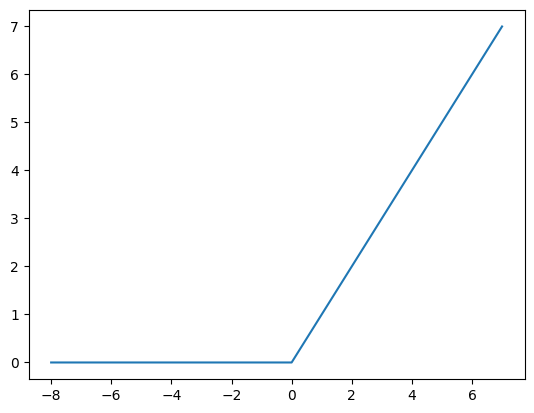

In [ ]:
import matplotlib.pyplot as plt
X = torch.tensor(range(-8,8,1))
Y = torch.relu(X)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X.detach(), Y.detach())
fig.show()

In [ ]:
pip show d2l

Name: d2l
Version: 0.17.6
Summary: Dive into Deep Learning
Home-page: https://d2l.ai
Author: D2L Developers
Author-email: d2l.devs@gmail.com
License: MIT-0
Location: /usr/local/lib/python3.10/dist-packages
Requires: jupyter, matplotlib, numpy, pandas, requests
Required-by: 


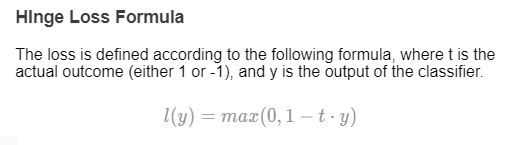

**6. PyTorch Margin Ranking Loss Function**

In [ ]:
import torch
import torch.nn as nn

input_one = torch.tensor([1,2,3], requires_grad=True, dtype=float)
input_two = torch.tensor([2,3,4], requires_grad=True, dtype=float)
target = torch.tensor([-1,-1,-1]).sign() #extract the sign of number

ranking_loss = nn.MarginRankingLoss(margin=1.2) #rank margin can be assigned
output = ranking_loss(input_one, input_two, target)
output.backward()

print('input one: ', input_one)
print('input two: ', input_two)
print('target: ', target)
print('output: ', output)

input one:  tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)
input two:  tensor([2., 3., 4.], dtype=torch.float64, requires_grad=True)
target:  tensor([-1, -1, -1])
output:  tensor(0.2000, dtype=torch.float64, grad_fn=<MeanBackward0>)


**7. PyTorch Triplet Margin Loss Function**

In [ ]:
import torch
import torch.nn as nn
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)

triplet_margin_loss = nn.TripletMarginLoss(margin=1.0, p=2)
output = triplet_margin_loss(anchor, positive, negative)
output.backward()

print('anchor: ', anchor)
print('positive: ', positive)
print('negative: ', negative)
print('output: ', output)

**8. PyTorch Kullback-Leibler Divergence Loss Function**

P=1.000 Q=1.000


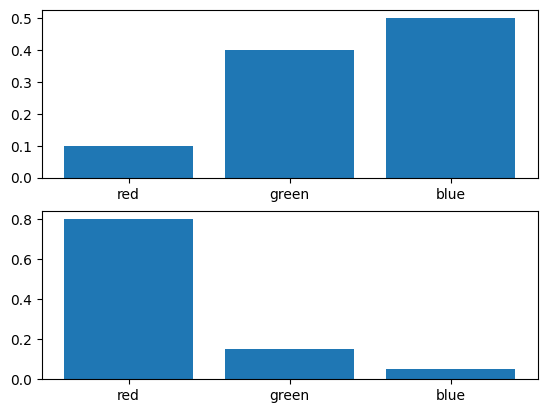

In [ ]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
 return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))


# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)



KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


In [ ]:
import torch
import torch.nn as nn

input = torch.randn(2, 3, requires_grad=True)
target = torch.randn(2, 3)

kl_loss = nn.KLDivLoss(reduction = 'batchmean')
output = kl_loss(input, target)
output.backward()

print('input: ', input)
print('target: ', target)
print('output: ', output)

input:  tensor([[ 0.6989,  0.5068,  1.0372],
        [-1.8772,  0.3312, -0.0780]], requires_grad=True)
target:  tensor([[-1.7988,  0.1533, -0.1582],
        [ 2.3595,  1.2268, -0.3844]])
output:  tensor(nan, grad_fn=<DivBackward0>)
